# This projet is about classic sign classification

In [ ]:
# Connect our colab to kaggle
from google.colab import files
files.upload()

Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"rakibabente","key":"2f0f55faea3bf4bb30478b4d4236478f"}'}

In [ ]:
# Install Kaggle Api
! pip install -q kaggle

In [ ]:
# create a folder for the kaggle folder
! mkdir -p ~/.kaggle
!cp "kaggle(1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# create a directory for my data
! mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [ ]:
# search for the dataset
! kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark    641568792  2018-11-25 18:12:34.427000         166287       1277  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                          4471088826  2019-08-31 18:22:11.850000          20556        327  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                          123621493  2023-07-11 04:21:24.180000           3157         38  1.0

In [ ]:
# downloading the dataset
! kaggle datasets download  meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 82% 503M/612M [00:00<00:00, 1.76GB/s]
100% 612M/612M [00:00<00:00, 1.75GB/s]
/content


In [ ]:
# Unzip the dowlod files
! unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
! rm -rf traffic_sign_dataset/gtsrb-german-traffic-sign.zip
! rm -rf traffic_sign_dataset/meta
! rm -rf traffic_sign_dataset/meta
! rm -rf traffic_sign_dataset/test
! rm -rf traffic_sign_dataset/train
! rm -rf traffic_sign_dataset/meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

# import libararies


In [ ]:
# import labraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.image import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf
import random


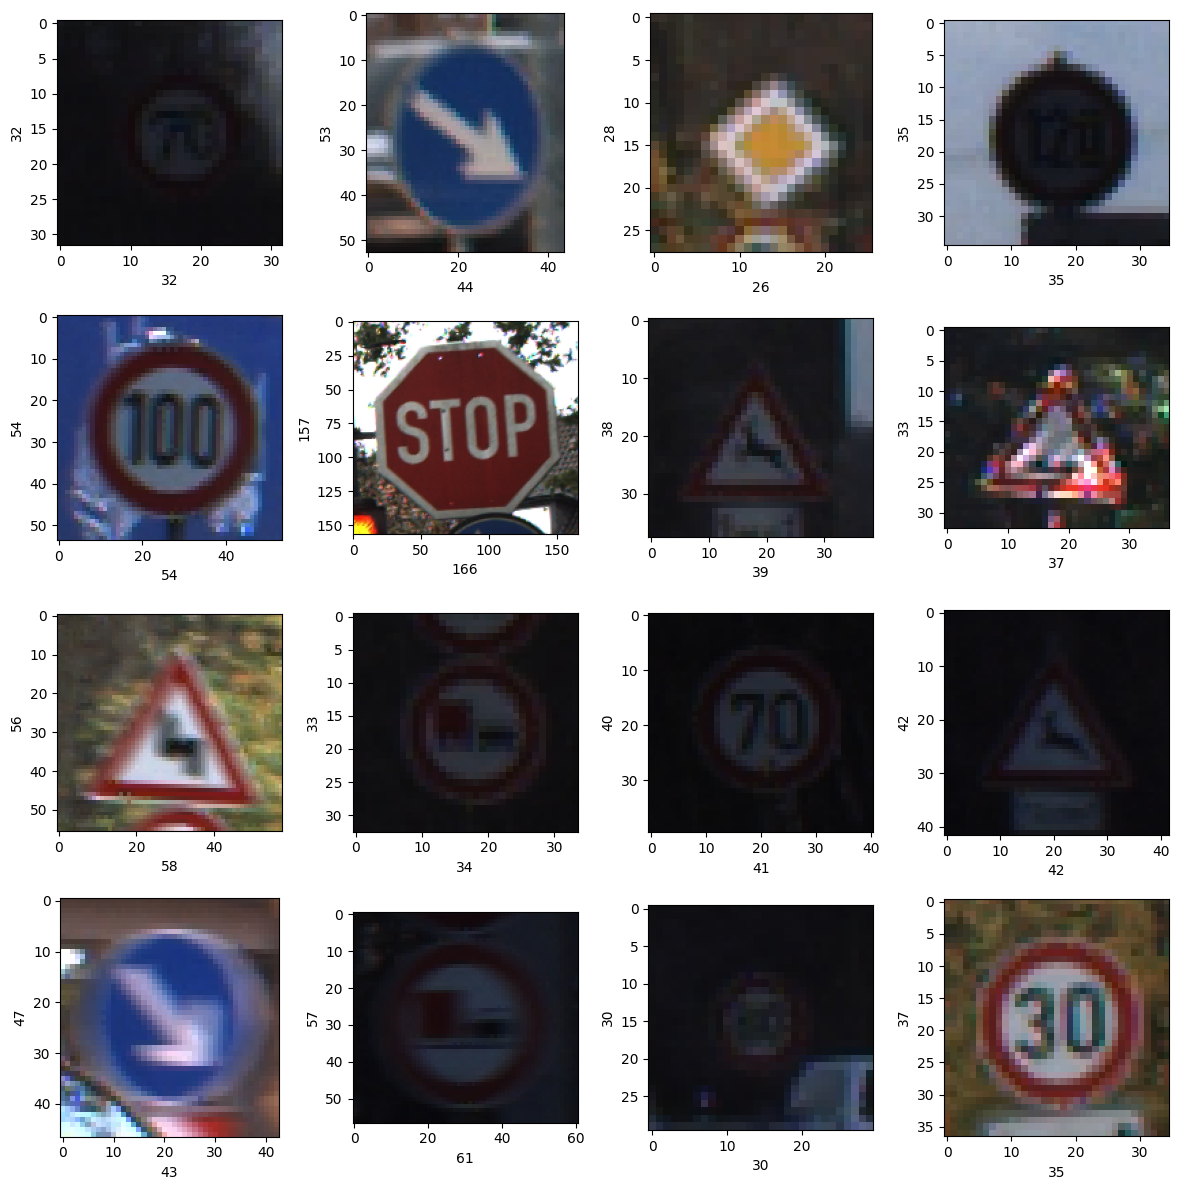

In [ ]:
# plotting 12 images to check datasets
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  #rand_img = imread(path + "/" + random.choice(sorted(os.listdir(path))))

  rand_img = imread(os.path.join(path,random.choice(sorted(os.listdir(path)))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10)
  plt.ylabel(rand_img.shape[0],fontsize=10)


### Check all the image size and resize it

In [ ]:
# check the size of the image
dim1 = []
dim2 = []
for i in range(0,43):
  labels = 'traffic_sign_dataset/Train/' + str(i)
  for x in os.listdir(labels):
    img = imread(labels + "/" + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [ ]:
# now find the mean of the image
print(np.mean(dim1))
print(np.mean(dim2))

50.328929582493814
50.83587951745773


In [ ]:
# Now we will resize the image in the same size and savce the img into image list and label into label list
from PIL import Image
images = []
labels_id = []
for i in range(43):
  labels = 'traffic_sign_dataset/Train/' + str(i)
  image_path = os.listdir(labels)
  for x in os.listdir(labels):
    img = Image.open(labels + "/" + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    labels_id.append(i)


In [ ]:
# convert image to numpy and resize it
images = np.array(images)
images = images/255


In [ ]:
# Convert the label into array
labels_id = np.array(labels_id)
labels_id.shape

(39209,)

In [ ]:
images.shape

(39209, 50, 50, 3)

In [ ]:
# visualizate the number of class count
label_count = pd.DataFrame(labels_id).value_counts()
label_count.head()

,count
0,
2,2250
1,2220
13,2160
12,2100
38,2070


In [ ]:
#  splitt the data into train and
X_train, X_val, y_train, y_val = train_test_split(images, labels_id, test_size=0.2, random_state=42)

In [ ]:
# convert the label into one-hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Now set the architesture we want to use to train the model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                 input_shape=X_train.shape[1:], padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Now train the model
# mount gogle drive
from google.colab import drive
drive.mount('/content/drive')

# save the model check point
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "/content/drive/MyDrive/Traffic_Sign_classification_model.keras"
checkpoin_cb = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max')

history = model.fit(
    X_train, y_train_cat,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val_cat),
    callbacks=[checkpoin_cb])

# ========== SAVE FINAL MODEL ==========
model.save(checkpoint_path)
print("\nModel saved to:", checkpoint_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2606 - loss: 2.7181
Epoch 1: val_accuracy improved from -inf to 0.79686, saving model to /content/drive/MyDrive/Traffic_Sign_classification_model.keras
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.2608 - loss: 2.7174 - val_accuracy: 0.7969 - val_loss: 0.7272
Epoch 2/50
971/981 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6743 - loss: 0.9936
Epoch 2: val_accuracy improved from 0.79686 to 0.94784, saving model to /content/drive/MyDrive/Traffic_Sign_classification_model.keras
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6747 - loss: 0.9923 - val_accuracy: 0.9478 - val_loss: 0.3167
Epoch 3/50
977/981 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7855 - loss: 0.6512
Epoch 3: val_accuracy improved from 0.94784 to 0.96251, saving model to /content/drive/MyDrive/Traffic_Sign_cl

<Axes: >

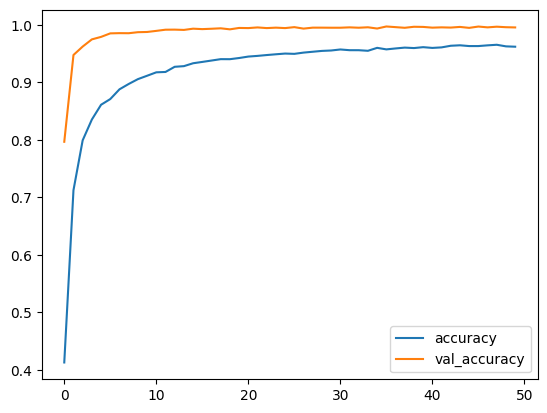

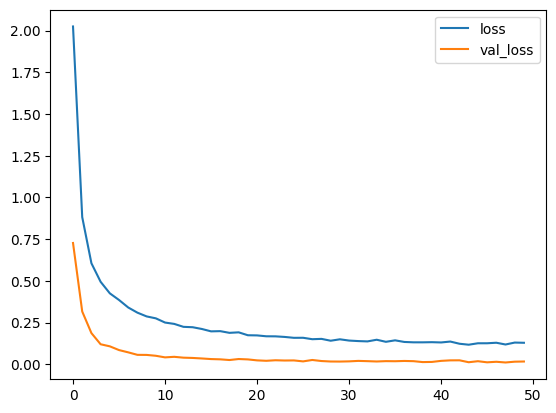

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [ ]:
# # define a function that will scale image
# def scaling(  test_path):


#   images = []
#   file_names = os.listdir(test_path)
#   for x in file_names:
#     img = Image.open(test_path + "/" + x)
#     img = img.resize((50,50))
#     img = np.array(img)
#     images.append(img)
#   images = np.array(images)
#   images = images/255
#   return images, file_names


In [ ]:
from  PIL import Image
def scaling(test_images, test_path):
    images = []
    images_path = test_images
    for x in images_path:
        img = Image.open(test_path + "/" + x)
        img = img.resize((50, 50))
        img = np.array(img)
        images.append(img)

    images = np.array(images)
    images = images / 255
    return images


In [ ]:
test_data = scaling(sorted(os.listdir(test_path)), test_path)

In [ ]:
# test_data

In [ ]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
y_pred = model.predict(test_data)
y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[3.7923839e-33, 1.5361337e-21, 4.3362161e-24, ..., 1.8830448e-35,
        3.0893556e-33, 6.9136947e-26],
       [7.4784475e-20, 1.0000000e+00, 3.5047623e-17, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [6.7435613e-13, 2.5973137e-08, 5.9738700e-06, ..., 3.7323819e-06,
        1.6608865e-03, 7.8418443e-04],
       [2.9672987e-13, 5.3227114e-07, 4.5252170e-07, ..., 3.1691538e-14,
        7.4837425e-25, 9.0413621e-11],
       [7.7490682e-26, 7.9670159e-17, 2.7464811e-14, ..., 1.1939702e-18,
        6.5746839e-21, 2.4577438e-15]], dtype=float32)

In [ ]:
y_pred_prob = np.argmax(y_pred, axis=1)
y_pred_prob

array([16,  1, 38, ..., 32,  7, 10])

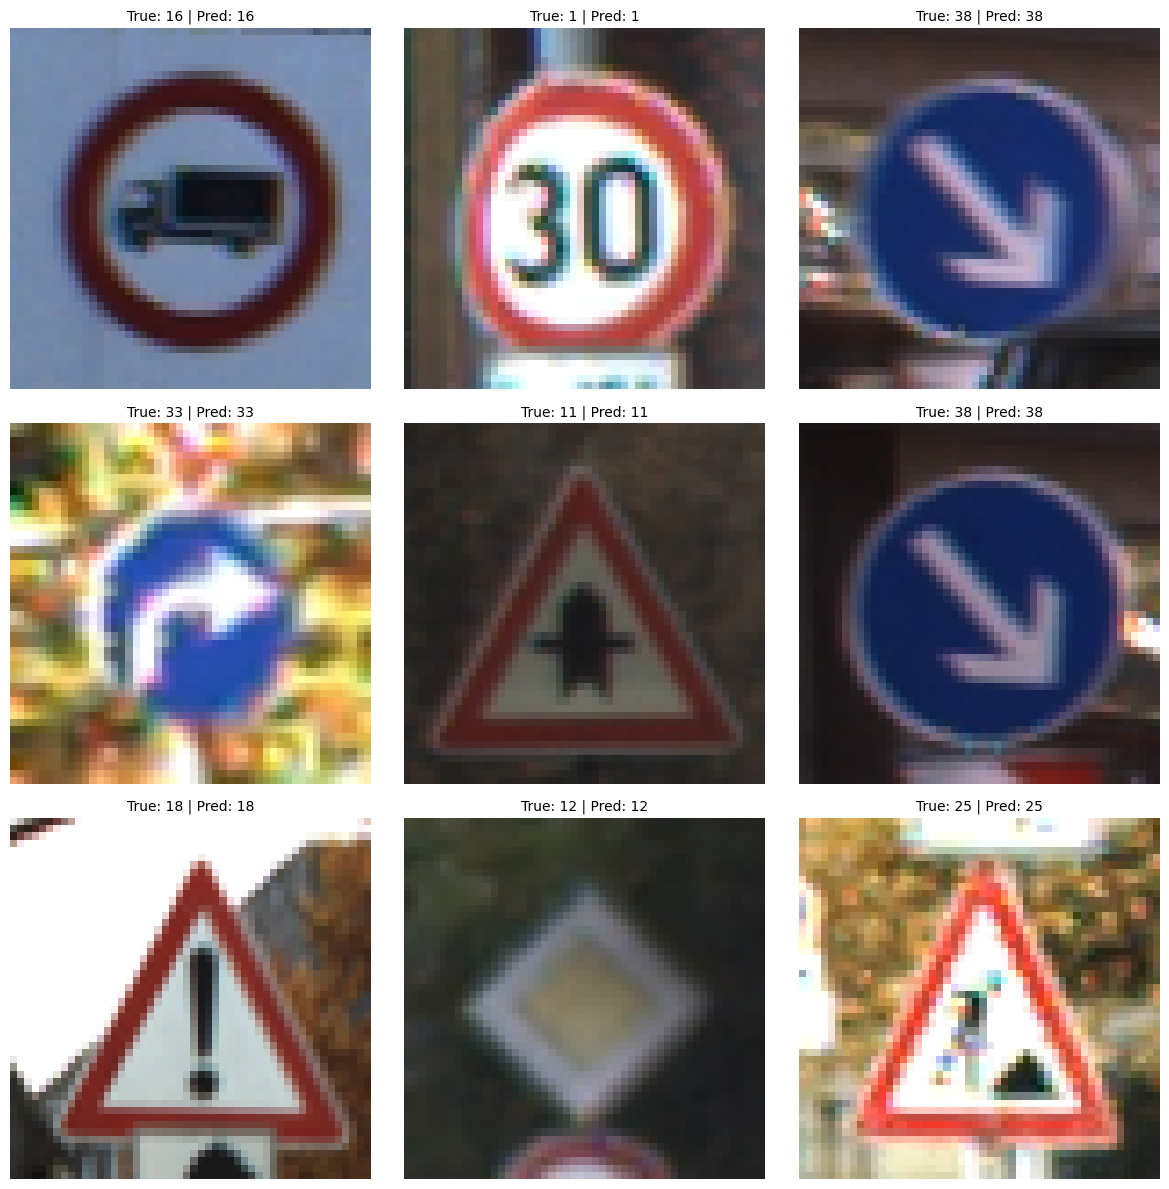

In [ ]:
import matplotlib.pyplot as plt

def show_9_predictions():
    plt.figure(figsize=(12, 12))

    for i in range(9):  # show first 9 images
        img = test_data[i]
        true = y_test[i]
        pred = y_pred_prob[i]

        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {true} | Pred: {pred}", fontsize=10)

    plt.tight_layout()
    plt.show()

# Call the function
show_9_predictions()


### Conclusion
In this project I build a model which based on image classify traffic Sign image and predict the function